In [113]:
import datetime

class QueueInstance:
    net_id = ""
    id = 0
    room_id = 0
    summary = ""
    helpee_user_id = 0
    helper_user_id = 0
    start_help_time = datetime.datetime.min 
    stop_help_actor_user_id =  datetime.datetime.min 
    stop_help_time = datetime.datetime.min 
    stop_help_type = datetime.datetime.min 
    created_at = datetime.datetime.min 
    updated_at = datetime.datetime.min 
    helpee_join_time = datetime.datetime.min
    
    
    def __init__(self, var0, var1, var2, var3, var4, var5, var6, var7, var8, var9, var10, var11, var12):
        self.net_id = var0
        self.id = var1
        self.room_id = var2
        self.summary = var3
        self.helpee_user_id = var4
        self.helper_user_id = var5
        self.start_help_time = var6
        self.stop_help_actor_user_id = var7
        self.stop_help_time = var8
        self.stop_help_type = var9
        self.created_at = var10
        self.updated_at = var11
        self.helpee_join_time = var12

In [114]:
import csv
from datetime import datetime
from collections import defaultdict
import pytz

cst_tz = pytz.timezone('US/Central')
# populate all queue instances into a list 
my_list = []


staff = {}
with open('/Users/georgesdurand/Downloads/queue_public_users (1).csv', 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        id = row['id']
        user_type = row['user_type']
        staff[id] = row['net_id']
        #if(user_type == "staff"):
            

with open('cs128.csv', 'r') as f:
    reader = csv.reader(f) #csv.DictReader
    count = 0
    for row in reader:
        if count != 0:
            try:
                res = bool(datetime.strptime(row[5], '%Y-%m-%d %H:%M:%S.%f'))
                res = bool(datetime.strptime(row[7], '%Y-%m-%d %H:%M:%S.%f'))
                res = bool(datetime.strptime(row[9], '%Y-%m-%d %H:%M:%S.%f'))
                res = bool(datetime.strptime(row[10], '%Y-%m-%d %H:%M:%S.%f'))
                res = bool(datetime.strptime(row[11], '%Y-%m-%d %H:%M:%S.%f'))
            except ValueError:
                res = False
            if res != False:
                my_list.append(QueueInstance(staff[row[4]],
                                            row[0],
                                            row[1],
                                            row[2],
                                            row[3],
                                            row[4],
                                            datetime.strptime(row[5],'%Y-%m-%d %H:%M:%S.%f').replace(tzinfo=pytz.utc).astimezone(cst_tz),
                                            row[6],
                                            datetime.strptime(row[7], '%Y-%m-%d %H:%M:%S.%f').replace(tzinfo=pytz.utc).astimezone(cst_tz),
                                            row[8],
                                            datetime.strptime(row[9], '%Y-%m-%d %H:%M:%S.%f').replace(tzinfo=pytz.utc).astimezone(cst_tz),
                                            datetime.strptime(row[10], '%Y-%m-%d %H:%M:%S.%f').replace(tzinfo=pytz.utc).astimezone(cst_tz),
                                            datetime.strptime(row[11], '%Y-%m-%d %H:%M:%S.%f').replace(tzinfo=pytz.utc).astimezone(cst_tz)))
        count+=1


In [82]:
from datetime import datetime
from dateutil.parser import parse
format_data = '%Y-%m-%d %H:%M:%S.%f' # maybe of use for later

 
      
my_list.sort(key=lambda date: date.created_at) # sort values based on the date it was created (if it wasnt already sorted)



In [115]:
from datetime import datetime
from collections import defaultdict

sorted_datetimes = defaultdict(list)

for dt in my_list:
    key = f'{dt.created_at.year}-{dt.created_at.month}-{dt.created_at.day}'
    sorted_datetimes[key].append(dt)

In [ ]:
from datetime import datetime
from itertools import groupby
#from collections import defaultdict

week_days = defaultdict(lambda: defaultdict(list))

for key, values in sorted_datetimes.items():
    for dt in values:
        week = f'{dt.created_at.year}-W{dt.created_at.isocalendar()[1]}'
        day = dt.created_at.strftime('%A')
        week_days[week][day].append(dt)

print(week_days)

In [ ]:
import matplotlib.pyplot as plt

def plot_number_of_queue_occurences():
    for week, days in week_days.items():
        days_count = {}
        for day, values in days.items():
            days_count[day] = len(values)
        plt.figure()
        plt.title(week)
        plt.bar(days_count.keys(), days_count.values())
        plt.xlabel("Day of the week")
        plt.ylabel("Number of occurrences")
        plt.show()

In [ ]:
import matplotlib.pyplot as plt


for week, days in week_days.items():
    for day, values in days.items():
        hour_values = [dt.created_at.hour for dt in values]
        plt.figure()
        plt.title(f"{week} - {day}")
        plt.hist(hour_values, bins=24, density=True)
        plt.xlabel("Hour of the day")
        plt.ylabel("Density")
        plt.xticks(range(24), [dt.strftime("%H") for dt in [datetime.now().replace(hour=i) for i in range(24)]])
        plt.show()

In [ ]:
import pytz

def plot():
    cst_tz = pytz.timezone('US/Central')

for week, days in week_days.items():
    for day, values in days.items():
        hour_values = [dt.created_at.hour for dt in values]
        values = [dt.created_at.replace(tzinfo=pytz.utc).astimezone(cst_tz) for dt in values] # convert the datetime objects from UTC to CST
        hour_values = [dt.hour for dt in values]
        plt.figure()
        plt.title(f"{week} - {day}")
        plt.hist(hour_values, bins=24, density=True)
        plt.xlabel("Hour of the day")
        plt.ylabel("Density")
        plt.xticks(range(24), [dt.strftime("%H") for dt in [datetime.now().replace(hour=i) for i in range(24)]])
        plt.show()

In [226]:
import csv

# def create_user_objects(file_path):
#     with open(file_path, 'r') as file:
#         reader = csv.reader(file)
#         headers = next(reader)
#         days = headers[1:]
#         users = []
#         for row in reader:
#             user = {'name': row[0]}
#             working_days = [day for i, day in enumerate(days) if row[i + 1]]
#             user['working_days'] = working_days
#             users.append(user)
#     return users


In [86]:
import pandas as pd

xl = pd.read_excel('/Users/georgesdurand/Downloads/22b-office-hours.xlsx', sheet_name=None)

# Initialize a list to store the resulting DataFrames
df_list = []
weekly_schedule = {}
# Loop through each sheet in the Excel file
for sheet_name, df in xl.items():

    
    df = df.T
    weekly_schedule[sheet_name] = df

    df_list.append(df)

# Concatenate the resulting DataFrames into a single DataFrame
result = pd.concat(df_list)

# Print the resulting DataFrame
print(weekly_schedule["Tuesday"])

                   0         1         2         3         4         5
11-12          12-13     13-14     18-19     19-20     20-21     21-22
cmunoz34    cmunoz34  cmunoz34      slp3      slp3   wenyus2  caylajr2
gdurand2    gdurand2      bg16   augoel2   augoel2  caylajr2   seanlu2
lsosani2      ewcai2    ewcai2  athisht2  athisht2   seanlu2     basu9
bab8        lsosani2  samuela7   nwong27  junsitu2     basu9  junsitu2
Unnamed: 5      bg16  lsosani2   kychou2   kychou2  junsitu2   kychou2
Unnamed: 6  samuela7       NaN  samuela7       NaN   kychou2       NaN


In [118]:

import pandas as pd
sheet_names = pd.read_excel('/Users/georgesdurand/Downloads/22b-office-hours.xlsx', sheet_name=None).keys()
dfs = {}
for sheet in sheet_names:
    df = pd.read_excel('/Users/georgesdurand/Downloads/22b-office-hours.xlsx', sheet_name=sheet, header=None)
    df[['start_time', 'end_time']] = df[0].str.split("-", expand=True)
    df.drop(0, axis=1, inplace=True)
    df = df.melt(id_vars=['start_time', 'end_time'], var_name='worker_num', value_name='staff_id')
    df = df.dropna(subset=['staff_id'])
    df = df.reset_index(drop=True)
    dfs[sheet] = df
dfs

{'Monday':    start_time end_time worker_num  staff_id
 0          11       12          1  gdurand2
 1          12       13          1  gdurand2
 2          13       14          1    ewcai2
 3          18       19          1      slp3
 4          19       20          1      slp3
 5          20       21          1   wenyus2
 6          21       22          1   wenyus2
 7          11       12          2  lsosani2
 8          12       13          2    ewcai2
 9          13       14          2      bg16
 10         18       19          2  evanoff3
 11         19       20          2  evanoff3
 12         20       21          2  caylajr2
 13         21       22          2  caylajr2
 14         11       12          3      bab8
 15         12       13          3  lsosani2
 16         13       14          3  gdurand2
 17         18       19          3  jszhang4
 18         19       20          3  athisht2
 19         20       21          3  evanoff3
 20         21       22          3  evanoff3


In [88]:
import csv
from collections import defaultdict

def parse_weekdays(weekdays):
    for week, week_day in weekdays.items():
        for day_of_week, queue_instances in week_day.items():
            for queue_instance in queue_instances:
                staff_id = queue_instance.net_id
                staff_dict[staff_id][week][day_of_week].append(queue_instance)
    return staff_dict

staff_dict = parse_weekdays(week_days)

staff_dict['gdurand2']

defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>,
            {'2022-W24': defaultdict(list,
                         {'Monday': [<__main__.QueueInstance at 0x13c51d540>,
                          'Tuesday': [<__main__.QueueInstance at 0x13c51c370>,
                          'Sunday': [<__main__.QueueInstance at 0x13cf08b80>,
                           <__main__.QueueInstance at 0x13cf781c0>]}),
             '2022-W25': defaultdict(list,
                         {'Tuesday': [<__main__.QueueInstance at 0x13cf097e0>,
                          'Wednesday': [<__main__.QueueInstance at 0x13cf0a560>,
                          'Thursday': [<__main__.QueueInstance at 0x13cb508b0>,
                           <__main__.QueueInstance at 0x13d03cf70>]}),
             '2022-W26': defaultdict(list,
                         {'Tuesday': [<__main__.QueueInstance at 0x13cbc0a60>,
                          'Wednesday': [<__main__.QueueInstance at 0x13cbe25c0>,
                          'Thurs

In [223]:
from datetime import datetime, timedelta
from datetime import timedelta
class Staff_Member:
    def __init__(self, id):
        self.id = id
        self.schedule = {
            'Monday': [],
            'Tuesday': [],
            'Wednesday': [],
            'Thursday': [],
            'Friday': [],
            'Saturday': [],
            'Sunday': []
        }
        self.hours_to_work = {
            'Monday': 0,
            'Tuesday': 0,
            'Wednesday': 0,
            'Thursday': 0,
            'Friday': 0,
            'Saturday': 0,
            'Sunday': 0
        }
        self.weeks_work = defaultdict(lambda: defaultdict(list))
        self.hours_worked = defaultdict(lambda: {
            'Monday': 0,
            'Tuesday': 0,
            'Wednesday': 0,
            'Thursday': 0,
            'Friday': 0,
            'Saturday': 0,
            'Sunday': 0
        })
        
        self.queue_instances = defaultdict(lambda: {
            'Monday': 0,
            'Tuesday': 0,
            'Wednesday': 0,
            'Thursday': 0,
            'Friday': 0,
            'Saturday': 0,
            'Sunday': 0
        })
        
        
    def add_shift(self, day, start_time, end_time):
        
        self.schedule[day].append((start_time, end_time))
        start_timedelta = timedelta(hours=start_time.hour)
        end_timedelta = timedelta(hours=end_time.hour)
        
        # print(start_timedelta)
        # print(end_timedelta)
        hours_to_work = end_timedelta - start_timedelta
        self.hours_to_work[day] += hours_to_work.total_seconds() / 3600
    def add_work(self, work):
        self.weeks_work = work

        
    def get_schedule(self):
        return self.schedule
    def get_hours_to_work(self):
        return self.hours_to_work
    def get_weeks_work(self):
        return self.weeks_work

staff_members = {}

for day, df in dfs.items():
    
    staff_ids = df['staff_id'].unique()

    for staff_id_ in staff_ids:
        if staff_id_ not in staff_members:
            staff_members[staff_id_] = Staff_Member(staff_id_)
            staff_members[staff_id_].add_work(staff_dict[staff_id_])
            
        for week_, days_ in staff_dict[staff_id_].items():
            for day_, queue_instances in days_.items():
                total_hours = 0
                instances = 0
                for queue_instance in queue_instances:

                    total_hours += (queue_instance.stop_help_time - queue_instance.start_help_time) / timedelta(hours=1)
                    instances += 1
                staff_members[staff_id_].hours_worked[week_][day_] = total_hours
                staff_members[staff_id_].queue_instances[week_][day_] = instances
        
        
        
        
        shifts = df.loc[df['staff_id'] == staff_id_, ['start_time', 'end_time']]
        # print(staff_id)
        # print(shifts)
        for _, shift in shifts.iterrows():
            start_time = datetime.strptime(shift['start_time'], '%H').time()
            end_time = datetime.strptime(shift['end_time'], '%H').time()
            
            #print(start_time)
            # print(day)
            staff_members[staff_id_].add_shift(day, start_time, end_time)
            
worker = staff_members['gdurand2']

#print(worker.schedule)
#staff_members['gdurand2'].weeks_work

# 1 map of staff members where key net id of staff member second key is week, the value is the dictionary with key day of week and value queue instances

# 2 map where the key is the week (Year-Week) and the second key is the day of that week where the valuue is the queue instances that include all staff members

#iterate through all the weeks, then all the days of those weeks, for each queue instance, we have the netid, meaning we can populate 1.

# map1[QueueInstance.netId][week][day].append(QueueInstance)







In [221]:
print(staff_members['gdurand2'].hours_worked['2022-W29'])
print(staff_members['gdurand2'].hours_to_work)

print(staff_members['gdurand2'].queue_instances['2022-W25'])

{'Monday': 1.8369985344444446, 'Tuesday': 3.5676999233333335, 'Wednesday': 0.9953210033333333, 'Thursday': 5.87337195, 'Friday': 0, 'Saturday': 0, 'Sunday': 0}
{'Monday': 3.0, 'Tuesday': 2.0, 'Wednesday': 2.0, 'Thursday': 2.0, 'Friday': 0, 'Saturday': 0, 'Sunday': 2.0}
{'Monday': 0, 'Tuesday': 4, 'Wednesday': 16, 'Thursday': 8, 'Friday': 0, 'Saturday': 0, 'Sunday': 0}


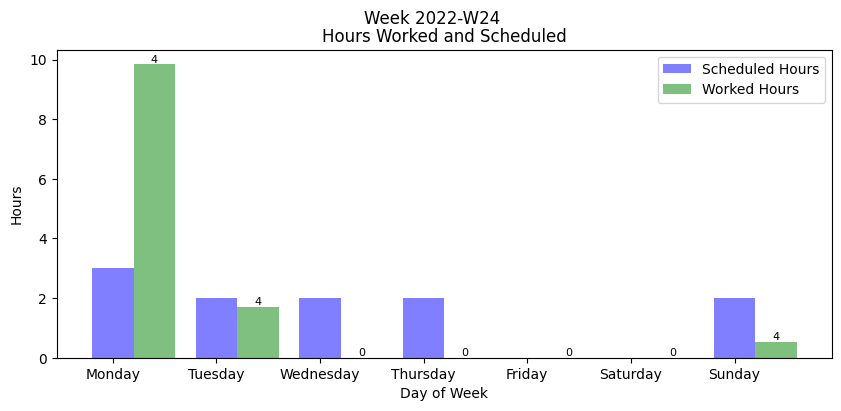

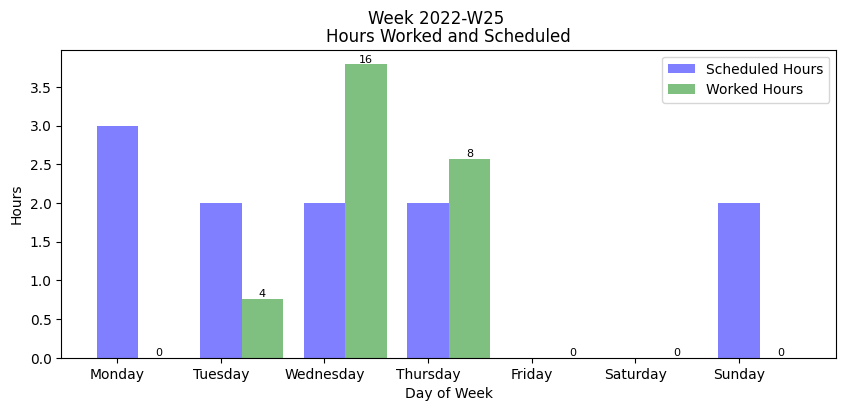

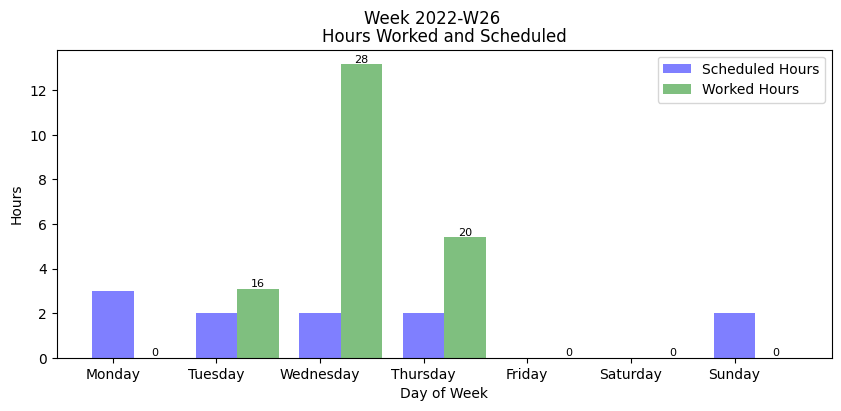

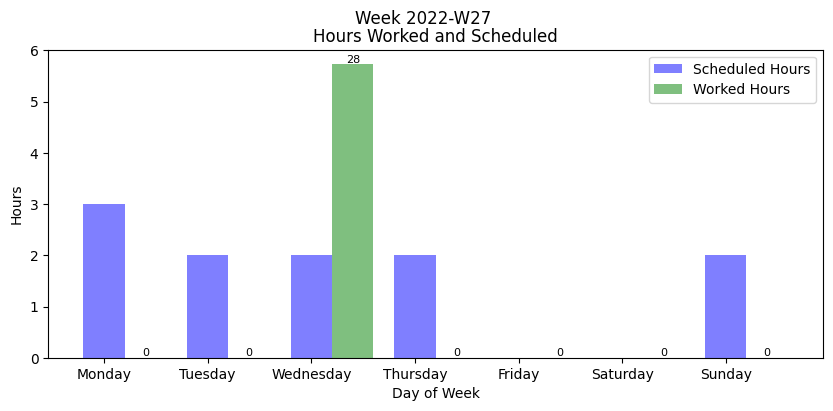

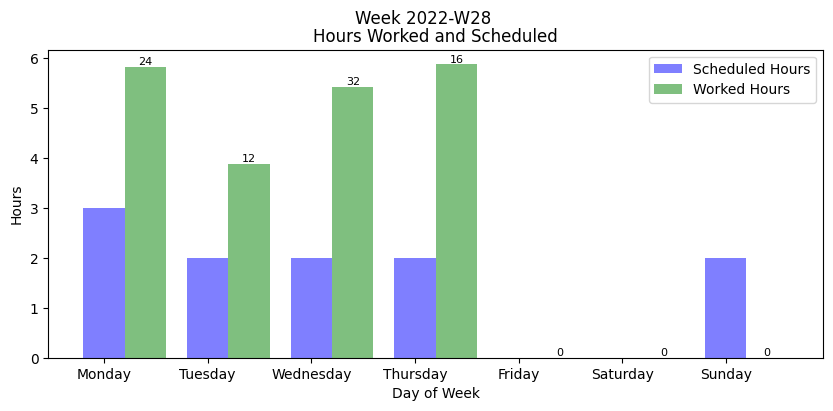

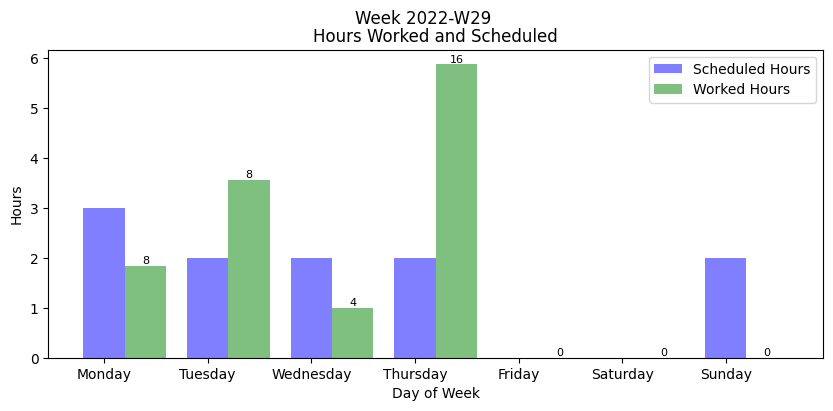

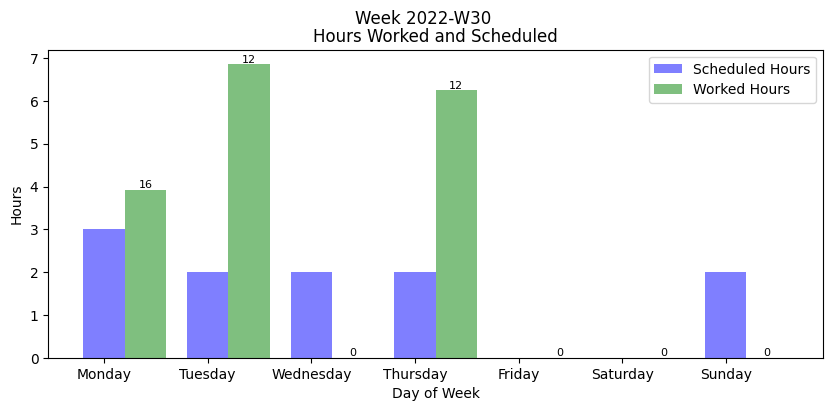

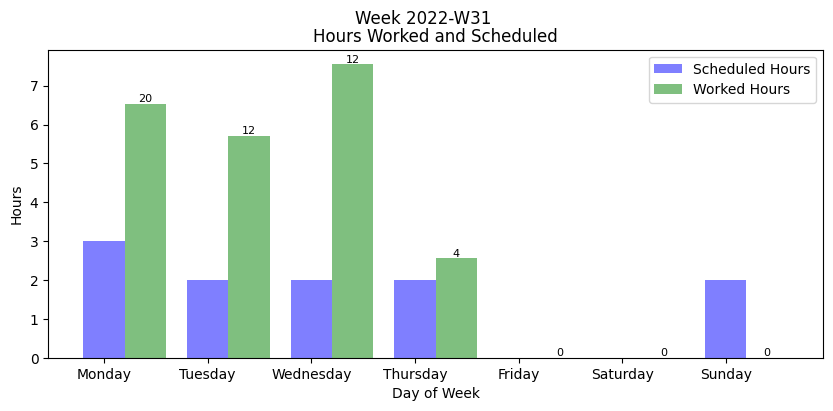

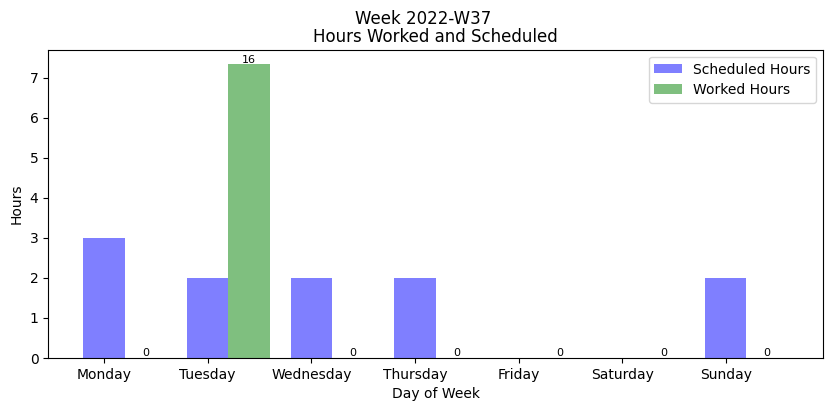

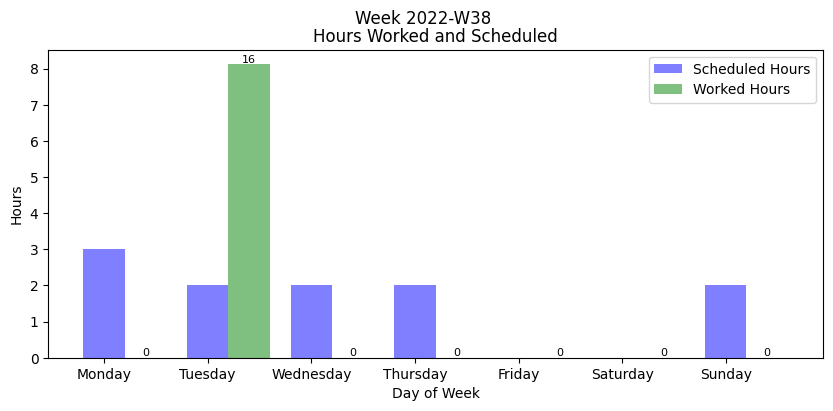

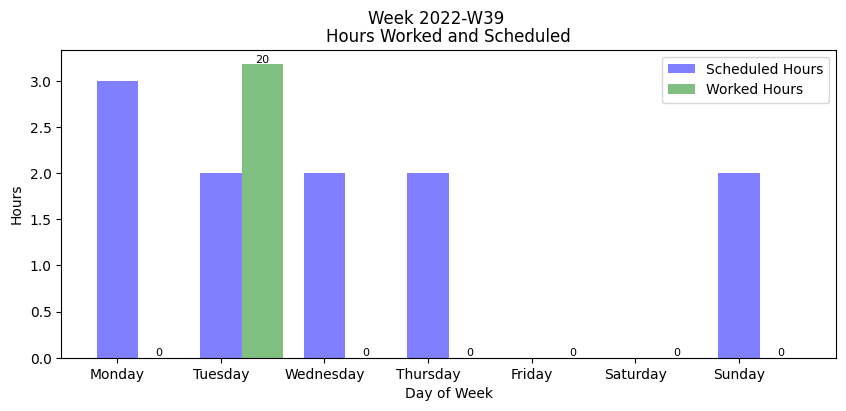

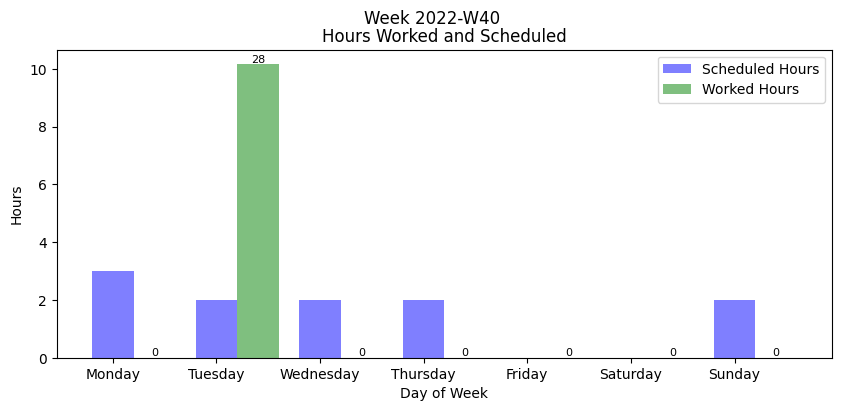

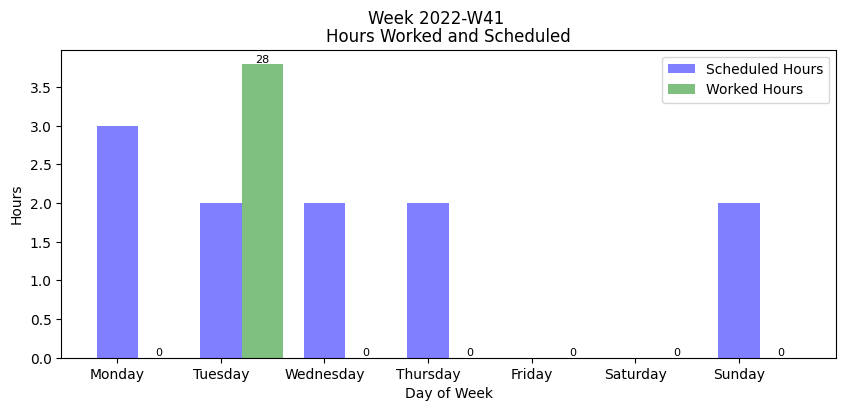

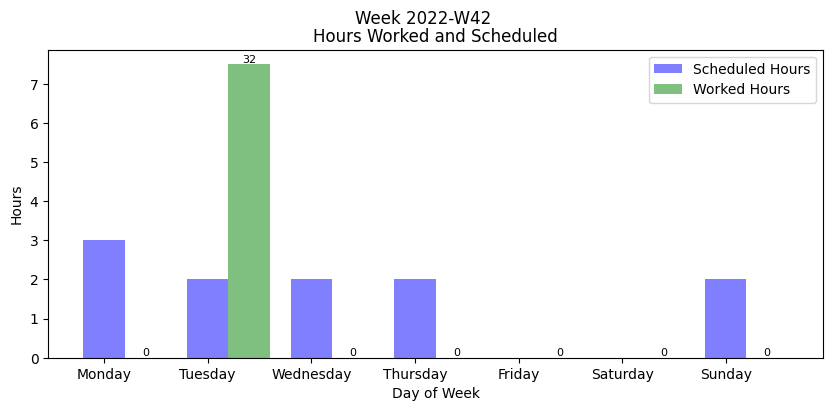

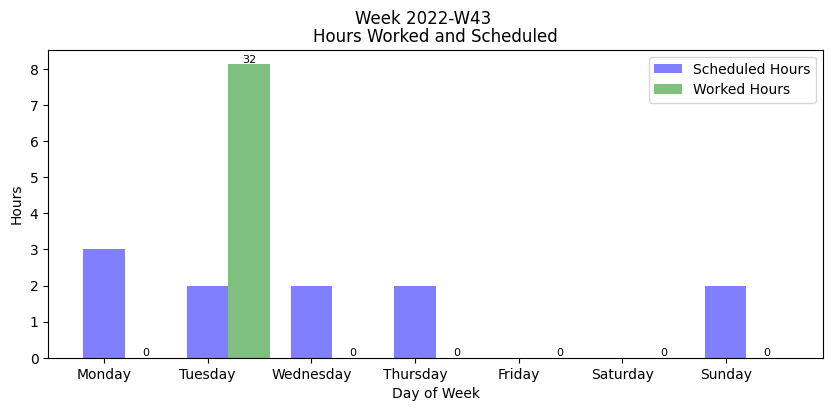

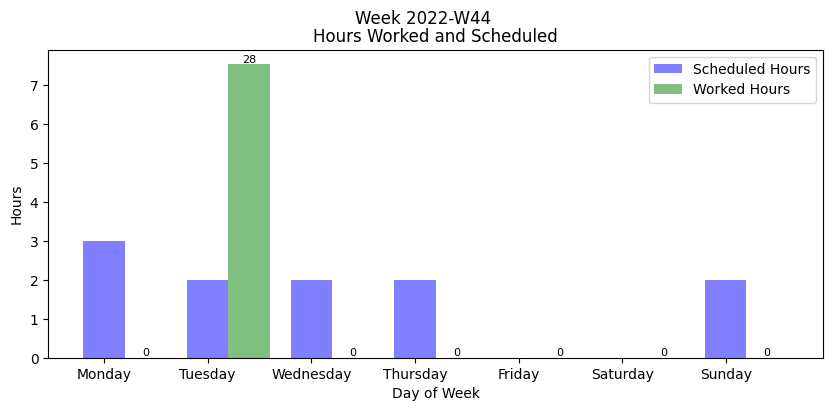

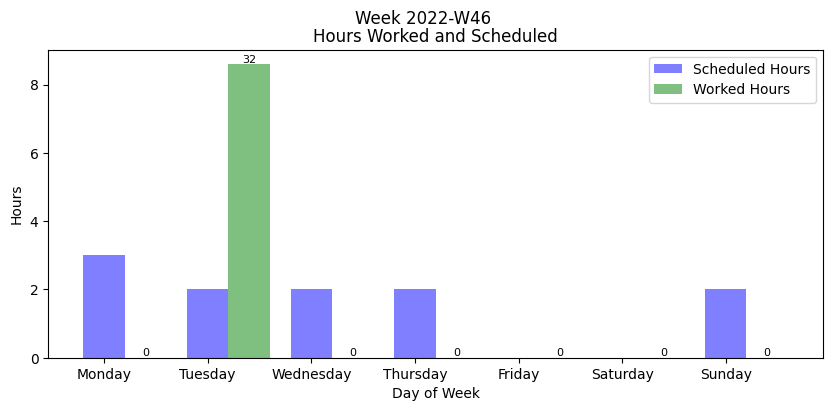

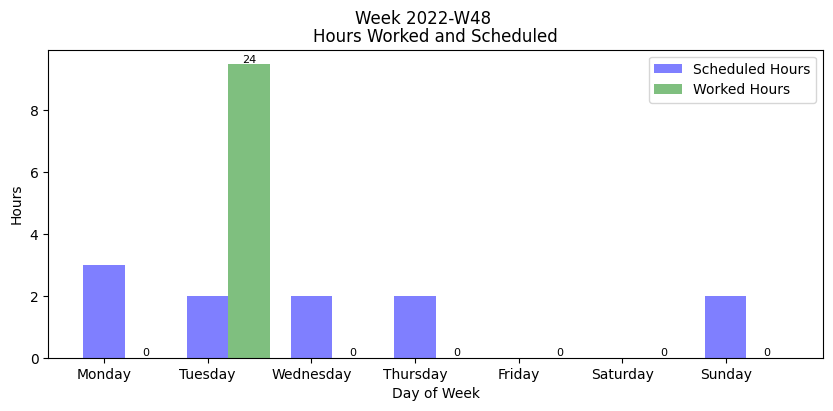

In [224]:
import matplotlib.pyplot as plt
import numpy as np
def plot_hours_worked(staff_member):
    for week, hours_worked in staff_member.hours_worked.items():
        hours_to_work = staff_member.hours_to_work
        queue_instances = staff_member.queue_instances.get(week, {})
        fig, ax = plt.subplots(figsize=(10, 4))
        fig.suptitle(f"Week {week}")
        day_map = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}

        bar_width = 0.4
        opacity = 0.5
        ax.bar([day_map[day] for day in hours_to_work.keys()], hours_to_work.values(), bar_width,
               alpha=opacity, color='b', label='Scheduled Hours')

        ax.bar([day_map[day] + bar_width for day in hours_worked.keys()], hours_worked.values(), bar_width,
               alpha=opacity, color='g', label='Worked Hours')

        for day, instances in queue_instances.items():
            if day in hours_worked:
                x = day_map[day] + bar_width 
                y = hours_worked[day]  # offset label above bar
                ax.text(x, y, str(instances), ha='center', va='bottom', fontsize=8)
        # relabel x-axis
        ax.set_xticks(range(7))
        ax.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
        ax.set_xlabel('Day of Week')
        ax.set_ylabel('Hours')
        ax.set_title('Hours Worked and Scheduled')
        ax.legend()
        plt.show()

plot_hours_worked(staff_members['gdurand2'])

In [58]:
import csv
from collections import defaultdict

staff_dict = defaultdict(lambda: defaultdict(lambda: defaultdict(list)))
with open('/Users/georgesdurand/Downloads/queue_public_users (1).csv', 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        id = row['id']
        user_type = row['user_type']
        staff_dict[id]
        # if(user_type == "staff"):
def parse_weekdays(weekdays):
    for week, week_day in weekdays.items():
        for day_of_week, queue_instances in week_day.items():
            for queue_instance in queue_instances:
                staff_id = queue_instance.helper_user_id
                staff_dict[staff_id][week][day_of_week].append(queue_instance)
    return staff_dict

# parse_weekdays(week_days)['28']



defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>,
            {'2022-W24': defaultdict(list,
                         {'Monday': [<__main__.QueueInstance at 0x12fc509a0>],
                          'Tuesday': [<__main__.QueueInstance at 0x12fdcc7f0>],
                          'Sunday': [<__main__.QueueInstance at 0x12fc40f70>]}),
             '2022-W25': defaultdict(list,
                         {'Tuesday': [<__main__.QueueInstance at 0x12fc41bd0>],
                          'Wednesday': [<__main__.QueueInstance at 0x12fc42950>,
                          'Thursday': [<__main__.QueueInstance at 0x12fc43eb0>,
                           <__main__.QueueInstance at 0x12fc43fd0>]}),
             '2022-W26': defaultdict(list,
                         {'Tuesday': [<__main__.QueueInstance at 0x12fc2bfd0>,
                          'Wednesday': [<__main__.QueueInstance at 0x12fc45b70>,
                          'Thursday': [<__main__.QueueInstance at 0x12fc24af0>,
                 

In [2]:
# from collections import defaultdict
# from datetime import timedelta

# def find_help_times_per_week(queue_instances, week_days):
#     sorted_datetimes = defaultdict(list)
#     for queue in queue_instances:
#         sorted_datetimes[queue.helper_user_id].append(queue)

#     helper_week_times = defaultdict(list)
#     for helper_id, queues in sorted_datetimes.items():
#         queues.sort(key=lambda q: q.start_help_time)
#         start = queues[0].start_help_time
#         stop = start + timedelta(days=week_days)
#         for queue in queues:
#             if queue.start_help_time < stop:
#                 if queue.stop_help_time > stop:
#                     helper_week_times[helper_id].append((start, stop))
#                     start = stop
#                     stop = start + timedelta(days=week_days)
#                 else:
#                     helper_week_times[helper_id].append((start, queue.stop_help_time))
#                     start = stop
#                     stop = start + timedelta(days=week_days)
#             else:
#                 start = queue.start_help_time
#                 stop = start + timedelta(days=week_days)
#                 helper_week_times[helper_id].append((start, queue.stop_help_time))
#     return helper_week_times

# helper_week_times = find_help_times_per_week(my_list, 7)

# helper_week_times['28']

NameError: name 'my_list' is not defined